<a href="https://colab.research.google.com/github/MohamedKKhalaf/Unsupervised-Learning-/blob/main/Unsupervised_project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data_frame=pd.read_csv("emails.csv")


In [ ]:
data=data_frame
print(len(data_frame.columns))
print(data_frame.shape)
print(data.to_numpy())
temp=data.to_numpy()

3002
(5172, 3002)
[['Email 1' 0 0 ... 0 0 0]
 ['Email 2' 8 13 ... 1 0 0]
 ['Email 3' 0 0 ... 0 0 0]
 ...
 ['Email 5170' 0 0 ... 0 0 1]
 ['Email 5171' 2 7 ... 1 0 1]
 ['Email 5172' 22 24 ... 0 0 0]]


In [ ]:
#save the labels
spam_labels=[]
for i in range(len(data)):
  spam_labels.append(temp[i][len(data.columns)-1])

len(spam_labels)

5172

In [ ]:
# to drop the Email No column
data.drop(columns=data.columns[0],
        axis=1,
        inplace=True)
data.drop(columns=data.columns[len(data.columns)-1],
        axis=1,
        inplace=True)
print(data.to_numpy())
print(data.shape)

[[ 0  0  1 ...  0  0  0]
 [ 8 13 24 ...  0  1  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  0]
 [ 2  7  1 ...  0  1  0]
 [22 24  5 ...  0  0  0]]
(5172, 3000)


In [ ]:
original_data=data

In [ ]:
from scipy import stats
i=(np.abs(stats.zscore(data)) < 20).all(axis=1)

In [ ]:
i

array([ True, False,  True, ...,  True,  True, False])

In [ ]:
false=[]
for j in range(len(i)):
  if i[j]==False:
    false.append(j)

In [ ]:
len(false)

1422

In [ ]:

#Z=x-mean/std
#the number of standard deviations a given data point lies above or below mean
data=data[(np.abs(stats.zscore(data)) < 20).all(axis=1)]

In [ ]:
print(data.shape)

(3750, 3000)


In [ ]:
spam_lab_modified=[]
for j in range(len(i)):
  if i[j]==True:
    spam_lab_modified.append(spam_labels[j])

len(spam_lab_modified)

3750

In [ ]:
X=data.to_numpy()
X.shape

(3750, 3000)

## **Fuzzy C-Means using Builtin Func**

In [ ]:
pip install fuzzy-c-means

     |████████████████████████████████| 15.7 MB 7.1 MB/s 
     |████████████████████████████████| 10.9 MB 34.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from fcmeans import FCM

model=FCM(n_clusters=2)
model.fit(X)

In [ ]:
centers=model.centers
labels=model.predict(X)
print(centers.shape)

(2, 3000)


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(2)
pca2=PCA(2)

In [ ]:
transformed_data=pca.fit_transform(X)
print(transformed_data.shape)
trans_centers=pca2.fit_transform(centers)
print(trans_centers.shape)

(3750, 2)
(2, 2)


In [ ]:
trans_original=pca.fit_transform(original_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


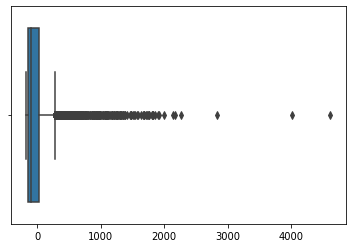

In [ ]:
import seaborn as sns
sns.boxplot(trans_original[:,0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


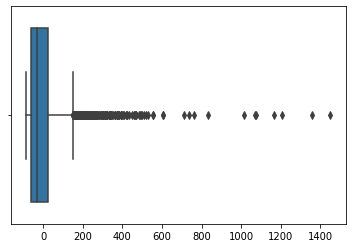

In [ ]:
sns.boxplot(transformed_data[:,0])

In [ ]:
unique_labels=np.unique(labels)
labels.shape
unique_labels.shape

(2,)

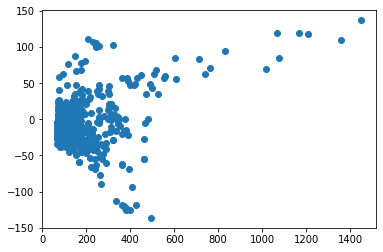

In [ ]:
import matplotlib.pyplot as plt

label0 = transformed_data[labels ==0]
plt.scatter(label0[:,0] , label0[:,1])
plt.show()

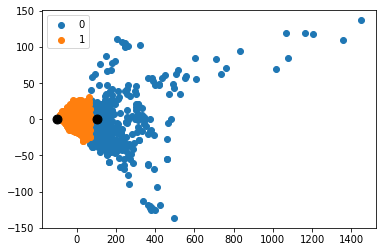

In [ ]:
for i in unique_labels:
    # if i!=1:
      plt.scatter(transformed_data[labels == i , 0] , transformed_data[labels == i , 1] , label = i)
plt.scatter(trans_centers[:,0] , trans_centers[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

In [ ]:
count=0
for i in range(len(labels)):
  if labels[i]==spam_lab_modified[i]:
    count=count+1

count/len(labels)

0.32693333333333335

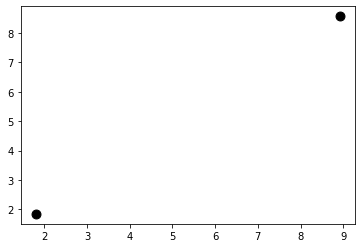

In [ ]:
plt.scatter(centers[:,0] , centers[:,1] , s = 80, color = 'black')

# **Fuzzy C-Means From Scratch**

### **parameters**

In [ ]:
l_data=len(data)
clusters=2
dim_cluster=len(data.columns)
fuzzy_parameter=1.7

### **initializing membership function**

In [ ]:
def initializeMembershipWeights():
  weight = np.random.dirichlet(np.ones(clusters),l_data)
  membershipWeights = np.array(weight)
  return membershipWeights

### **Calculating Cluster Center**

In [ ]:
#Cj=SUM(Mij^g*Xi)/SUM(Mij^g)
def computeCentroids(membershipWeights):
  Centroids = []
  for i in range(clusters):
    weight_sum = np.power(membershipWeights[:,i],fuzzy_parameter).sum() #Denominator
    Cj = []
    for x in range(dim_cluster):
      numerator = (data.iloc[:,x].values * np.power(membershipWeights[:,i],fuzzy_parameter)).sum()
      c_val = numerator/weight_sum;
      Cj.append(c_val)
    Centroids.append(Cj)
  return Centroids

### **Updating Membership Matrix**

In [ ]:
#Mij=1/Σm=1 to c(dij/dim)^(2/g-1)
#CCi1=Σi=1 to N((Mi1^g *Xi1)/(Mi1^g)=A/B
#CCi2=Σi=1 to N((Mi2^g *Xi2)/(Mi2^g)=A/B
def updateMembershipFuncWeights(membershipWeights,C):
  denominator = np.zeros(l_data)
  for i in range(clusters):
    dist = (data.iloc[:,:].values - C[i])**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)#Euclidean dist
    denominator  = denominator + np.power(1/dist,1/(fuzzy_parameter-1))

  for i in range(clusters):
    dist = (data.iloc[:,:].values - C[i])**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    membershipWeights[:,i] = np.divide(np.power(1/dist,1/(fuzzy_parameter-1)),denominator)
  return membershipWeights

### **Run The Algorithm**

In [ ]:
def FCM_scratch():
  membershipWeights = initializeMembershipWeights()
  plt.figure(figsize=(50,50))
  for z in range(50):
    C = computeCentroids(membershipWeights)
    updateMembershipFuncWeights(membershipWeights,C)
  return (membershipWeights,C)

In [ ]:
updated_matrix,centroids=FCM_scratch()

<Figure size 3600x3600 with 0 Axes>

In [ ]:
print(len(updated_matrix))
updated_matrix

3750


array([[0.11896948, 0.88103052],
       [0.10776096, 0.89223904],
       [0.6534018 , 0.3465982 ],
       ...,
       [0.64544752, 0.35455248],
       [0.07399959, 0.92600041],
       [0.43426398, 0.56573602]])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(2)

In [ ]:
trans_Centroids=pca.fit_transform(centroids)

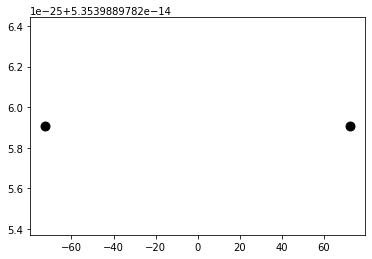

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(trans_Centroids[:,0] , trans_Centroids[:,1] , s = 80, color = 'black')

In [ ]:
labels_scratch=[]
for i in range(len(data)):
  max=updated_matrix[i][0]
  max_index=0
  for j in range(clusters):
    if updated_matrix[i][j]>max:
      max=updated_matrix[i][j]
      max_index=j
  labels_scratch.append(max_index)

labels_sc=np.array(labels_scratch).flatten()

In [ ]:
trans_data=pca.fit_transform(X)

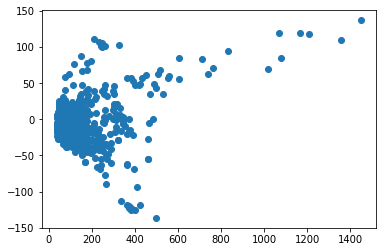

In [ ]:
label0_sc = trans_data[labels_sc ==0]
plt.scatter(label0_sc[:,0] , label0_sc[:,1])
plt.show()


In [ ]:
uniqe_lb_sc=np.unique(labels_sc)
uniqe_lb_sc.shape

(2,)

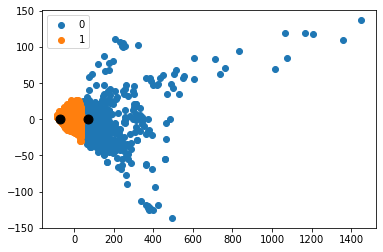

In [ ]:
for i in uniqe_lb_sc:
    # if i!=1:
      plt.scatter(trans_data[labels_sc == i , 0] , trans_data[labels_sc == i , 1] , label = i)
plt.scatter(trans_Centroids[:,0] , trans_Centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

In [ ]:
count=0
for i in range(len(labels_sc)):
  if labels_sc[i]==spam_lab_modified[i]:
    count=count+1

count/len(labels)

0.352